In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Define a list of documents as long strings
documents = [
    """Since OpenAI released its blockbuster bot ChatGPT in November, users have casually
    experimented with the tool, with even Insider reporters trying to simulate news stories or
message potential dates.To older millennials who grew up with IRC chat rooms — a text
instant message system — the personal tone of conversations with the bot can evoke the
experience of chatting online. But ChatGPT, the latest in technology known as "large
language model tools," doesn't speak with sentience and doesn't "think" the way people do.""",
    
    
    """Other tech companies like Google and Meta have developed their own large language
model tools, which use programs that take in human prompts and devise sophisticated
responses. OpenAI, in a revolutionary move, also created a user interface that is letting the
general public experiment with it directly. Some recent efforts to use chat bots for real-world
services have proved troubling — with odd results. The mental health company Koko came
under fire this month after its founder wrote about how the company used GPT-3 in an
experiment to reply to users.
""",
    
    
    """The founder of the controversial DoNotPay service, which claims its GPT-3-driven chat
bot helps users resolve customer service disputes, also said an AI "lawyer" would advise
defendants in actual courtroom traffic cases in real time, though he later walked that
back over concerns about its risks. Chat GPT is an AI Chatbot developed by Open AI. The
chatbot has a language-based model that the developer fine-tunes for human interaction in a
conversational manner. Effectively it’s a simulated chatbot primarily designed for customer
service; people use it for various other purposes too though. These range from writing essays
to drafting business plans, to generating code. But what is it and what can it really do?""",
    
    
    """Chat GPT is an AI chatbot auto-generative system created by Open AI for online
customer care. It is a pre-trained generative chat, which makes use of (NLP) Natural
Language Processing. The source of its data is textbooks, websites, and various articles,
which it uses to model its own language for responding to human interaction. The main
feature of Chat GPT is generating responses like those humans would provide, in a text box.
Therefore, it is suitable for chatbots, AI system conversations, and virtual
assistants. However, it can also give natural answers to questions in a conversational tone and
can generate stories poems and more. Moreover, it can: Write code, Write an article or blog
post, Translate, Debug, Write a story/poem, Recommend chords and lyrics""",
]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix
X = vectorizer.fit_transform(documents)

# Print the matrix shape and features
print(f"Matrix shape: {X.shape}")
#print(f"Features: {vectorizer.get_feature_names()}")
print(f"TF-IDF matrix:\n{X.toarray()}")

Matrix shape: (4, 231)
TF-IDF matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.05515526 0.         0.         0.         0.10569351
  0.         0.         0.         0.         0.10569351 0.
  0.16665995 0.         0.         0.         0.08332998 0.
  0.         0.0674628  0.         0.         0.10569351 0.05515526
  0.         0.         0.21138702 0.10569351 0.         0.
  0.         0.         0.         0.         0.         0.
  0.08332998 0.         0.         0.         0.         0.10569351
  0.         0.         0.         0.         0.         0.
  0.         0.         0.08332998 0.21138702 0.         0.
  0.         0.         0.         0.         0.10569351 0.10569351
  0.10569351 0.         0.10569351 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.10569351 0.
  0.08332998 0.         0.         0.         0.         0.
  0.         0.         0.1103

In [2]:
distances = cosine_distances(X)

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

C:\Users\Abhin\AppData\Local\Temp\ipykernel_12028\8745230.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='ward')


In [3]:
class HierarchicalAgglomerativeClustering:
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
        self.clusters = None

    def fit(self, X):
        # Initialize each document as a cluster
        self.clusters = [[i] for i in range(X.shape[0])]

        # Calculate pairwise distances between documents
        distances = np.zeros((X.shape[0], X.shape[0]))
        for i in range(X.shape[0]):
            for j in range(i+1, X.shape[0]):
                distances[i][j] = np.sqrt(np.sum((X[i]-X[j])**2))
                distances[j][i] = distances[i][j]

        # Merge clusters until the desired number of clusters is reached
        while len(self.clusters) > self.num_clusters:
            # Find the two closest clusters
            min_distance = np.inf
            for i in range(len(self.clusters)):
                for j in range(i+1, len(self.clusters)):
                    distance = self.get_cluster_distance(distances, self.clusters[i], self.clusters[j])
                    if distance < min_distance:
                        min_distance = distance
                        merge_clusters = (i, j)

            # Merge the two closest clusters
            self.clusters[merge_clusters[0]] += self.clusters[merge_clusters[1]]
            self.clusters.pop(merge_clusters[1])

        return self.clusters

    def get_cluster_distance(self, distances, cluster1, cluster2):
        distance = np.inf
        for i in cluster1:
            for j in cluster2:
                if distances[i][j] < distance:
                    distance = distances[i][j]
        return distance

In [8]:

# Create an instance of the clustering algorithm

# Use hierarchical agglomerative clustering to cluster the documents
Z = linkage(distances, method='ward')
X = squareform(pdist(X))

num_clusters = 3
labels = fcluster(Z, t=num_clusters, criterion='maxclust')
clustering = HierarchicalAgglomerativeClustering(num_clusters)

# Cluster the documents
clusters = clustering.fit(X)

# Print the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")

Cluster 1: [0]
Cluster 2: [1]
Cluster 3: [2, 3]


C:\Users\Abhin\AppData\Local\Temp\ipykernel_12028\472821119.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='ward')


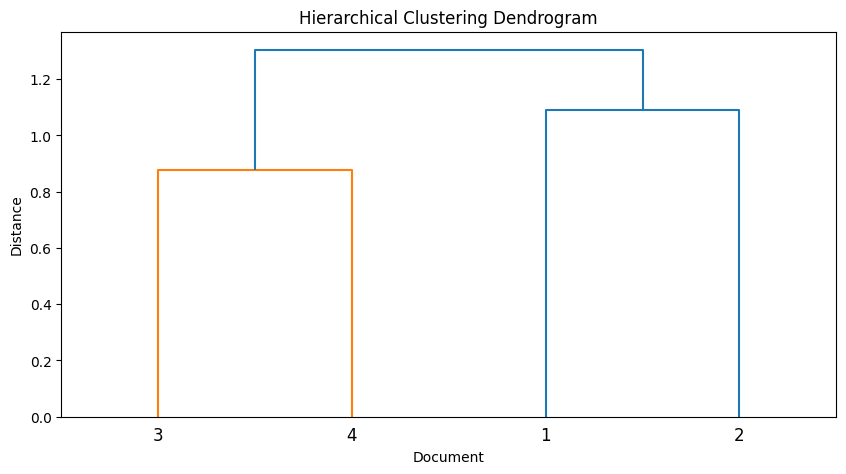

In [9]:
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=[i for i in range(1,len(documents)+1)], orientation='top')
plt.xlabel('Document')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()